<a href="https://colab.research.google.com/github/kaiqued/MachineLearning/blob/main/06/06_Colab_Le_C%C3%B4d%C3%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <span style="color:pink">**PROJETO FINAL DE MACHINE LEARNING 2022.1**</span>
### **COLORIZAÇÃO DE IMAGENS BASEADA EM CAPAS DE ÁLBUNS**
NICOLE SARVASI ALVES DA COSTA & KAÍQUE DOGNANI

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importação de bibliotecas:

In [2]:
from tensorflow import keras
from tensorflow.keras.utils import img_to_array, load_img
from skimage.color import rgb2hsv
import numpy as np
import os
from skimage.color import hsv2rgb
import PIL
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Importando a base de dados:

Passando as imagens para HSV e dividindo-as por canal de cor, o X_hsv para o canal de valor (V) e o Y_hsv para os canais de matriz (H) e saturação (S).

In [3]:
def RGB2X_Y():
    with open('drive/MyDrive/Colab Notebooks/dados.pkl', 'rb') as file:
        newDataSet = pickle.load(file)
        file.close()
    newDataSet = newDataSet[np.random.choice(newDataSet.shape[0], 1000), :, :, :]
    newDataSet = newDataSet/255.0
    for index, img in enumerate(newDataSet):
        newDataSet[index] = rgb2hsv(img)
    X_hsv = np.expand_dims(newDataSet[:,:,:,2], 3)
    Y_hsv = newDataSet[:,:,:,:2]

    return X_hsv, Y_hsv

X_train, Y_train = RGB2X_Y()

In [4]:
# with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'wb') as file:
#     pickle.dump((X_hsv, Y_hsv), file)

In [5]:
# with open('drive/MyDrive/Colab Notebooks/dados_XY.pkl', 'rb') as file:
#     X_hsv, Y_hsv = pickle.load(file)

Separando o conjunto de treino e teste:

In [6]:
Y_train.shape

(1000, 150, 150, 2)

In [7]:
X_train.shape

(1000, 150, 150, 1)

Criando um modelo básico:

In [8]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(256, input_shape=[150,150,1], kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(128, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(5, kernel_size=3, padding="same", activation="relu"),
#     keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="sigmoid"), 
# ])


In [9]:
# model = keras.models.Sequential([
#     keras.layers.Conv2D(2, input_shape=[150,150,1], kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(4, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(8, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.MaxPool2D(pool_size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(32, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(16, kernel_size=3, padding="same", activation="selu"),
#     keras.layers.UpSampling2D(size=(2,2)),
#     keras.layers.Resizing(150, 150),
#     keras.layers.BatchNormalization(),
#     keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="linear"), 
# ])


In [ ]:
model = keras.models.Sequential([
    keras.layers.Conv2D(2, input_shape=[150,150,1], kernel_size=3, padding="same", activation="selu"),
    keras.layers.Flatten(),
    keras.layers.Dense(),
    keras.layers.Dense(),
    keras.layers.Reshape(),
    keras.layers.Conv2D(2, kernel_size=3, padding="same", activation="linear"), 
])

In [10]:
model.compile(loss="mse", optimizer="nadam")

In [59]:
history = model.fit(X_train, Y_train, epochs=1000, batch_size=128)

#score = model.evaluate(X_test, Y_test)

Epoch 1/1000
8/8 [==============================] - 1s 116ms/step - loss: 0.0871
Epoch 2/1000
8/8 [==============================] - 1s 115ms/step - loss: 0.0872
Epoch 3/1000
8/8 [==============================] - 1s 114ms/step - loss: 0.0870
Epoch 4/1000
8/8 [==============================] - 1s 112ms/step - loss: 0.0870
Epoch 5/1000
8/8 [==============================] - 1s 112ms/step - loss: 0.0871
Epoch 6/1000
8/8 [==============================] - 1s 113ms/step - loss: 0.0868
Epoch 7/1000
8/8 [==============================] - 1s 113ms/step - loss: 0.0872
Epoch 8/1000
8/8 [==============================] - 1s 113ms/step - loss: 0.0875
Epoch 9/1000
8/8 [==============================] - 1s 112ms/step - loss: 0.0874
Epoch 10/1000
8/8 [==============================] - 1s 113ms/step - loss: 0.0874
Epoch 11/1000
8/8 [==============================] - 1s 114ms/step - loss: 0.0869
Epoch 12/1000
8/8 [==============================] - 1s 114ms/step - loss: 0.0873
Epoch 13/1000
8/8 [======

In [70]:
import PIL
path_img = "drive/MyDrive/Colab Notebooks/02.jpg"
file = PIL.Image.open(path_img)
if file.size != (150,150):
    file = file.resize((150,150))
    file.save(path_img)

In [71]:
img = img_to_array(load_img(path_img))
print(img.shape)

(150, 150, 3)


In [72]:
img_hsv   = rgb2hsv(img/255.0)
img_X_test = np.expand_dims(img_hsv[:,:,2],2)
print(img_X_test.shape)
img_Y_test = img_hsv[:,:,:2]

(150, 150, 1)


In [73]:
img_Y_pred = model.predict(np.array([img_X_test]))
img_Y_pred.shape

(1, 150, 150, 2)

In [74]:
img_pred_hsv = np.concatenate((img_Y_pred[0,:,:,:],img_X_test), axis=2)
img_test_hsv = np.concatenate((img_Y_test,img_X_test), axis=2)

In [75]:
print("img_pred_hsv",img_pred_hsv.shape)
print("img_teste_hsv",img_test_hsv.shape)

img_pred_hsv (150, 150, 3)
img_teste_hsv (150, 150, 3)


In [76]:
Imagem_Pred = (255*hsv2rgb(img_pred_hsv)).astype(np.uint8)
Imagem_Test = (255*hsv2rgb(img_test_hsv)).astype(np.uint8)
print("Imagem_Pred",Imagem_Pred.shape)
print("Imagem_Test",Imagem_Test.shape)

Imagem_Pred (150, 150, 3)
Imagem_Test (150, 150, 3)


Text(0.5, 1.0, 'Pred')

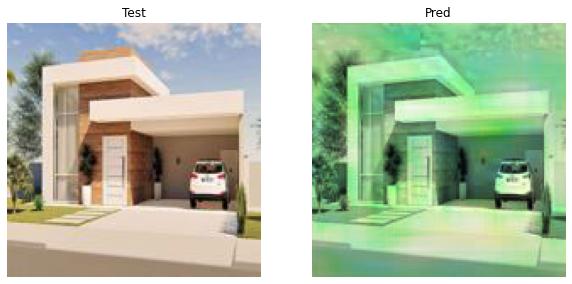

In [77]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(1,2,1)
plt.imshow(Imagem_Test)
plt.axis('off')
plt.title("Test")

fig.add_subplot(1,2,2)
plt.imshow(Imagem_Pred)
plt.axis('off')
plt.title("Pred")

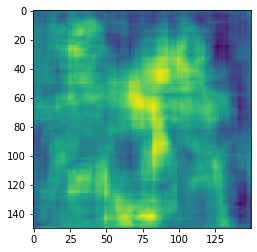

In [68]:
plt.imshow(img_pred_hsv[:,:,1])

In [69]:
img_pred_hsv.max()

1.0